# Data Wrangling Template

## Gather

### 1- Trying gather with my self

In [342]:
# Import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os

In [343]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

In [344]:
# Inisialize lists to get data columns in 
created_at = []
tweet_id = []
full_text = []
source=[]
followers_count = []
friends_count = []
listed_count = []
statuses_count = []

In [345]:
with open('tweet_json.txt','r') as file:
    f = list(file)
    for data in f:
        f1 = True
        f2 = True
        f3 = True
        f4 = True
        f5 = True
        f6 = True
        f7 = True
        f8 = True
        
        f_1 = data[1:-2].split(', ')
        for key in f_1:
            f_2 = key.split(':',maxsplit = 1)
            if (f_2[0][1:-1] == "created_at") & f1:
                x = f_2[1]
                created_at.append(x)
                f1 = False
                
            if (f_2[0][1:-1] == "id")  & f2:
                x = f_2[1][1:]
                tweet_id.append(x)
                f2 = False
            
            if (f_2[0][1:-1] == "full_text")  & f3:
                x = f_2[1]
                full_text.append(x)
                f3 = False
                
            if (f_2[0][1:-1] == "source")  & f4:
                x = f_2[1]
                source.append(x)
                f4 = False
            
            if (f_2[0][1:-1] == "followers_count")  & f5:
                x = f_2[1]
                followers_count.append(x)
                f5 = False
            
            if (f_2[0][1:-1] == "friends_count")  & f6:
                x = f_2[1]
                friends_count.append(x)
                f6 = False
            
            if (f_2[0][1:-1] == "listed_count")  & f7:
                x = f_2[1]
                listed_count.append(x)
                f7 = False
            
            if (f_2[0][1:-1] == "statuses_count") & f8:
                x = f_2[1]
                statuses_count.append(x)
                f8 = False

In [346]:
# Test the completness of my data 
print('created_at {}'.format(len(created_at)))
print('tweet_id {}'.format(len(tweet_id)))
print('full_text {}'.format(len(full_text)))
print('source {}'.format(len(source)))
print('followers_count {}'.format(len(followers_count)))
print('friends_count {}'.format(len(friends_count)))
print('listed_count {}'.format(len(listed_count)))
print('statuses_count {}'.format(len(statuses_count)))
print('f {}'.format(len(f)))

created_at 2354
tweet_id 2354
full_text 2354
source 2354
followers_count 2354
friends_count 2354
listed_count 2354
statuses_count 2354
f 2354


In [347]:
# Format my lists to add it in a DataFrame
data = zip(created_at,tweet_id,full_text,source,followers_count,friends_count,listed_count,statuses_count)

ind = np.array(['created_at', 'tweet_id', 'full_text', 'source', 'followers_count', 'friends_count', 'listed_count', 'statuses_count'])

In [348]:
df_gathered = pd.DataFrame(data = data, columns = ind)
df_gathered

,created_at,tweet_id,full_text,source,followers_count,friends_count,listed_count,statuses_count
0,"""Tue Aug 01 16:23:56 +0000 2017""",892420643555336193,"""This is Phineas. He's a mystical boy. Only e...","""<a href=\""http://twitter.com/download/iphone...",3200889,104,2784,5288
1,"""Tue Aug 01 00:17:27 +0000 2017""",892177421306343426,"""This is Tilly. She's just checking pup on yo...","""<a href=\""http://twitter.com/download/iphone...",3200889,104,2784,5288
2,"""Mon Jul 31 00:18:03 +0000 2017""",891815181378084864,"""This is Archie. He is a rare Norwegian Pounc...","""<a href=\""http://twitter.com/download/iphone...",3200889,104,2784,5288
3,"""Sun Jul 30 15:58:51 +0000 2017""",891689557279858688,"""This is Darla. She commenced a snooze mid me...","""<a href=\""http://twitter.com/download/iphone...",3200889,104,2784,5288
4,"""Sat Jul 29 16:00:24 +0000 2017""",891327558926688256,"""This is Franklin. He would like you to stop ...","""<a href=\""http://twitter.com/download/iphone...",3200889,104,2784,5288
...,...,...,...,...,...,...,...,...
2349,"""Mon Nov 16 00:24:50 +0000 2015""",666049248165822465,"""Here we have a 1949 1st generation vulpix. E...","""<a href=\""http://twitter.com/download/iphone...",3201018,104,2812,5288
2350,"""Mon Nov 16 00:04:52 +0000 2015""",666044226329800704,"""This is a purebred Piers Morgan. Loves to Ne...","""<a href=\""http://twitter.com/download/iphone...",3201018,104,2812,5288
2351,"""Sun Nov 15 23:21:54 +0000 2015""",666033412701032449,"""Here is a very happy pup. Big fan of well-ma...","""<a href=\""http://twitter.com/download/iphone...",3201018,104,2812,5288
2352,"""Sun Nov 15 23:05:30 +0000 2015""",666029285002620928,"""This is a western brown Mitsubishi terrier. ...","""<a href=\""http://twitter.com/download/iphone...",3201018,104,2812,5288


In [349]:
# Check duplication in each coulumn
print('created_at {}'.format(df_gathered['created_at'].duplicated().sum()))
print('tweet_id {}'.format(df_gathered['tweet_id'].duplicated().sum()))
print('source {}'.format(df_gathered['source'].duplicated().sum()))
print('followers_count {}'.format(df_gathered['followers_count'].duplicated().sum()))
print('friends_count {}'.format(df_gathered['friends_count'].duplicated().sum()))
print('listed_count {}'.format(df_gathered['listed_count'].duplicated().sum()))
print('statuses_count {}'.format(df_gathered['statuses_count'].duplicated().sum()))

created_at 0
tweet_id 0
source 2350
followers_count 2288
friends_count 2353
listed_count 2334
statuses_count 2353


### 2- Gather with given CSV file

In [350]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [412]:
# get 'image_predictions.tsv' by download it programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1] , mode='wb') as file:
    file.write(response.content)


In [415]:
img_pred = pd.read_csv(url.split('/')[-1], sep = '\t')
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assess

In [353]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [354]:
# Getting the first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [355]:
# Getting the last 5 rows
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [357]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [358]:
# Check duplication in some coulumns
print('tweet_id {}'.format(df['tweet_id'].duplicated().sum()))
print('in_reply_to_status_id {}'.format(df['in_reply_to_status_id'].duplicated().sum()))
print('in_reply_to_user_id {}'.format(df['in_reply_to_user_id'].duplicated().sum()))
print('timestamp {}'.format(df['timestamp'].duplicated().sum()))
print('text {}'.format(df['text'].duplicated().sum()))
print('retweeted_status_id {}'.format(df['retweeted_status_id'].duplicated().sum()))
print('retweeted_status_user_id {}'.format(df['retweeted_status_user_id'].duplicated().sum()))
print('retweeted_status_timestamp {}'.format(df['retweeted_status_timestamp'].duplicated().sum()))
print('expanded_urls {}'.format(df['expanded_urls'].duplicated().sum()))
print('rating_numerator {}'.format(df['rating_numerator'].duplicated().sum()))
print('rating_denominator {}'.format(df['rating_denominator'].duplicated().sum()))

tweet_id 0
in_reply_to_status_id 2278
in_reply_to_user_id 2324
timestamp 0
text 0
retweeted_status_id 2174
retweeted_status_user_id 2330
retweeted_status_timestamp 2174
expanded_urls 137
rating_numerator 2316
rating_denominator 2338


In [359]:
df.iloc[20].expanded_urls

'https://twitter.com/dog_rates/status/888078434458587136/photo/1,https://twitter.com/dog_rates/status/888078434458587136/photo/1'

In [360]:
df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [361]:
df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [362]:
df[df['rating_denominator'] > df['rating_numerator']].shape

(442, 17)

In [363]:
df[df['rating_denominator'] != 10].shape

(23, 17)

In [364]:
df[df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [365]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [366]:
i = 1;
for line in df['source']:
    
    if line == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        i +=1 
print(i)


92


In [367]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

## Quality issues 

- expanded_urls has some dublicated urls in the same row ex in row 19:
https://twitter.com/dog_rates/status/888078434458587136/photo/1,https://twitter.com/dog_rates/status/888078434458587136/photo/1

- 'source' has 92 rows has value = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' .co instead of .com

- 'tweet_id', 'in_reply_to_status_id' etc must be objects in df
- 'tweet_id' must be objects in img_pred ,too
- Remove None Value from 'doggo', 'floofer', 'pupper', 'puppo' by using replace method

- dogs have names = 'a' 'an' 'the' 'my'

- 'rating_numerator', 'rating_denominator' should be float

- Extract rating again as it has many errors and anomalous values

- We have a row = 313 has a rating_denominator = 0 

## Tidiness issues

- Melt 'doggo' 'floofer' 'pupper' 'puppo' as they are 4 column with one variable 'breeds'

- Make multiable CSV files each has only one type of informations



# Clean

In [368]:
df_clean = df.copy()

## Quality issues 

### Define

- expanded_urls has some dublicated urls in the same row 

### Code

In [369]:
new_url = []
for url in df_clean['expanded_urls']:
    try:
        i = url.split(',')[0]
        new_url.append(i)
    except:
        i = np.nan
        new_url.append(i)
df_clean['expanded_urls'] = new_url

### Test

In [370]:
print('The Old URL example : ' , df.iloc[20].expanded_urls)
print('The New URL : ' , df_clean.iloc[20].expanded_urls)

The Old URL example :  https://twitter.com/dog_rates/status/888078434458587136/photo/1,https://twitter.com/dog_rates/status/888078434458587136/photo/1
The New URL :  https://twitter.com/dog_rates/status/888078434458587136/photo/1


### Define

- 'source' has 92 rows has value = vine.co instead of vine.com

### Code

In [371]:
i = -1
ind = []
for line in df_clean['source']:
    i += 1
    if line == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        ind.append(i) 

for i in ind:
    df_clean['source'] = '<a href="http://vine.com" rel="nofollow">Vine - Make a Scene</a>'


### Test

In [372]:
for line in df_clean['source']:
    i += 1
    if line == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        print('Your solution is wrong')


### Define

- 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' must be objects
- 'tweet_id' must be objects in img_pred ,too

### Code

In [416]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype('str')
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype('str')
df_clean['retweeted_status_id'] = df_clean['retweeted_status_id'].astype('str')
df_clean['retweeted_status_user_id'] = df_clean['retweeted_status_user_id'].astype('str')
img_pred['tweet_id'] = img_pred['tweet_id'].astype('str')

### Test

In [374]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [417]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define

- Remove None Value from 'doggo', 'floofer', 'pupper', 'puppo' by using replace method

### Code

In [375]:
df_clean['doggo'] = df_clean['doggo'].replace('None','')
df_clean['floofer'] = df_clean['floofer'].replace('None','')
df_clean['pupper'] = df_clean['pupper'].replace('None','')
df_clean['puppo'] = df_clean['puppo'].replace('None','')

### Test

In [376]:
df_clean['doggo'].unique()

array(['', 'doggo'], dtype=object)

In [377]:
df_clean['floofer'].unique()

array(['', 'floofer'], dtype=object)

### Define

- dogs have names = 'a' 'an' 'the' 'None'

### Code

In [378]:
df_clean_copy = df_clean.copy()

In [379]:
# get all rows has 'a' in name
ind = df_clean_copy[df_clean_copy['name'] == 'a']['text'].index
# drop row which had a problem when renaming it
ind = ind.drop(labels = [649, 1049 ,1351 ,1499 ,2347 ,2350 ,2353])
# Rename ,ost of dogs that have names = 'a' 
for i in ind:
    names = df_clean_copy[df_clean_copy['name'] == 'a']['text'][i].split(sep = ' a ')[1]
    df_clean_copy['name'][i] = names.split(sep = ' ')[0]
    print('in index {} : {}'.format(i,names.split(sep = ' ')[0]))

in index 56 : pupper
in index 801 : Galapagos
in index 1002 : mighty
in index 1004 : terrible
in index 1017 : carrot.
in index 1193 : Deadly
in index 1207 : taco.
in index 1340 : heartbreaking
in index 1361 : Butternut
in index 1368 : Wild
in index 1382 : present
in index 1737 : giraffe.
in index 1785 : dog
in index 1853 : Sizzlin
in index 1854 : baby
in index 1877 : cow.
in index 1878 : fluffy
in index 1923 : Sagitariot
in index 1941 : heavily
in index 1955 : Lofted
in index 1994 : baby
in index 2034 : Tuscaloosa
in index 2066 : Helvetica
in index 2116 : Deciduous
in index 2125 : Rich
in index 2128 : Speckled
in index 2146 : spotted
in index 2153 : brave
in index 2161 : Coriander
in index 2191 : Slovakian
in index 2198 : wild
in index 2211 : horned
in index 2218 : Birmingham
in index 2222 : mother
in index 2235 : Trans
in index 2249 : Shotokon
in index 2255 : rare
in index 2264 : southwest
in index 2273 : northern
in index 2287 : Dasani
in index 2304 : curly
in index 2311 : purebred
i

C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [380]:
# Rename the rest of dog's name = 'a' manually 
df_clean_copy['name'][649] = ''
df_clean_copy['name'][1049] = 'Alaskan'
df_clean_copy['name'][1351] = ''
df_clean_copy['name'][1499] = ''
df_clean_copy['name'][2347] = 'blond'
df_clean_copy['name'][2350] = 'Wilson'
df_clean_copy['name'][2353] = 'pup'

C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

In [381]:
# get all rows has 'an' in name
ind = df_clean_copy[df_clean_copy['name'] == 'an']['text'].index
# drop row which had a problem when renaming it
for i in ind:
    names = df_clean_copy[df_clean_copy['name'] == 'an']['text'][i].split(sep = ' an ')[1]
    df_clean_copy['name'][i] = names.split(sep = ' ')[0]
    print('in index {} : {}'.format(i,names.split(sep = ' ')[0]))

in index 759 : East
in index 1025 : Iraqi
in index 1362 : East
in index 2204 : Irish
in index 2333 : extremely
in index 2335 : Albanian
in index 2349 : odd


C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [382]:
# get all rows has 'the' in name
df_clean_copy['name'][2346] = 'Rand Paul'

ind = df_clean_copy[df_clean_copy['name'] == 'the']['text'].index
# drop row which had a problem when renaming it
for i in ind:
    df_clean_copy['name'][i] = np.nan

C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [383]:
ind = df_clean_copy[df_clean_copy['name'] == 'None']['text'].index
# drop row which had a problem when renaming it
for i in ind:
    df_clean_copy['name'][i] = np.nan

C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Test

In [384]:
print(df_clean_copy[df_clean_copy['name'] == 'a']['name'].count())
print(df_clean_copy[df_clean_copy['name'] == 'an']['name'].count())
print(df_clean_copy[df_clean_copy['name'] == 'the']['name'].count())
print(df_clean_copy[df_clean_copy['name'] == 'None']['name'].count())

0
0
0
0


In [385]:
df_clean['name'] = df_clean_copy['name']

### Define

- 'rating_numerator', 'rating_denominator' should be float

- Extract rating again as it has many errors and anomalous values

### Code

In [386]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float')
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float')

In [387]:
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating = rating.astype(float)
rating.columns = ['rating_numerator', 'rating_denominator']

In [388]:
df_clean[['rating_numerator', 'rating_denominator']] = rating

### Test

In [389]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        1604 non-null   object 
 13  doggo                       2356 

In [390]:
df_clean[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
...,...,...
2351,5.0,10.0
2352,6.0,10.0
2353,9.0,10.0
2354,7.0,10.0


In [391]:
df_clean['rating_numerator'].unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.700e+01, 1.100e+01,
       1.000e+01, 4.200e+02, 6.660e+02, 6.000e+00, 1.500e+01, 1.820e+02,
       9.600e+02, 0.000e+00, 9.750e+00, 7.000e+00, 8.400e+01, 9.000e+00,
       2.400e+01, 8.000e+00, 1.000e+00, 5.000e+00, 1.127e+01, 3.000e+00,
       4.000e+00, 1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01,
       8.000e+01, 4.500e+01, 6.000e+01, 4.400e+01, 1.430e+02, 1.210e+02,
       2.000e+01, 9.500e+00, 1.126e+01, 2.000e+00, 1.440e+02, 8.800e+01])

### Define

- The row no. 313 has a rating_denominator = 0 and we can't divide on 0 so I will replace it with 1 

### Code

In [392]:
# Set it as 1 to not divide at 0 Error
df_clean_copy = df_clean.copy() 
df_clean_copy['rating_denominator'][313] =  1 
df_clean = df_clean_copy

C:\Users\DELL.SXH01\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test

In [393]:
print('The Old rating_denominator element in row 313 : ' , df['rating_denominator'][313])
print('The New rating_denominator element in row 313 : ' , df_clean['rating_denominator'][313])

The Old rating_denominator element in row 313 :  0
The New rating_denominator element in row 313 :  1.0


## Tidiness issues

### Define

- Melt 'doggo' 'floofer' 'pupper' 'puppo' as they are 4 column with one variable 'breeds
- Manage the multiable doog breed in the same tweet

### Code

In [394]:
df_clean['breed'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        1604 non-null   object 
 13  doggo                       2356 

In [395]:
df_clean.loc[df_clean.breed == 'doggopupper', 'breed'] = 'doggo, pupper'
df_clean.loc[df_clean.breed == 'doggopuppo', 'breed'] = 'doggo, puppo'
df_clean.loc[df_clean.breed == 'doggofloofer', 'breed'] = 'doggo, floofer'

In [396]:
df_clean.loc[df_clean.breed == '', 'breed'] = np.nan

### Test

In [397]:
df_clean['breed'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [398]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        1604 non-null   object 
 13  doggo                       2356 

In [399]:
df_clean = df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [400]:
df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10.0,Jax,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


<AxesSubplot:>

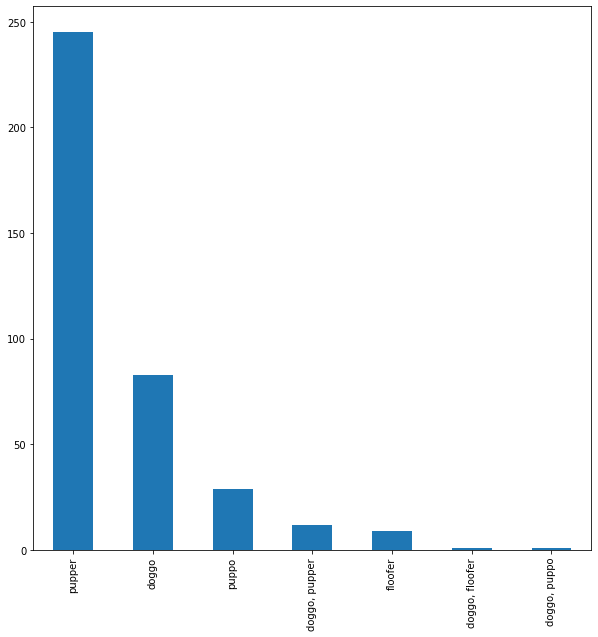

In [401]:
df_clean.breed.value_counts().plot(figsize = (10,10), kind = 'bar')

<AxesSubplot:ylabel='breed'>

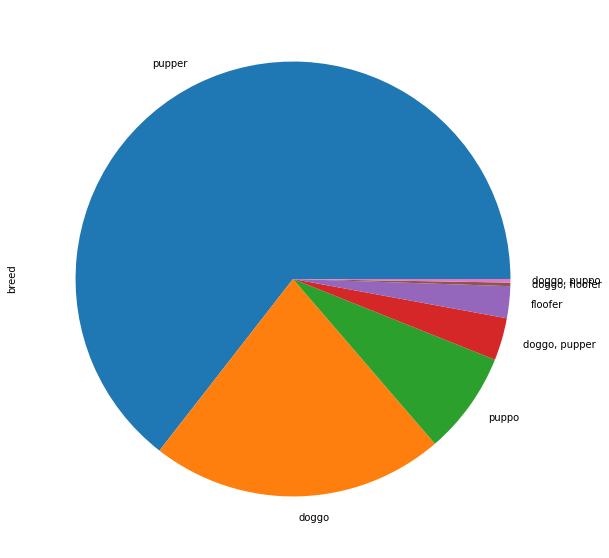

In [402]:
df_clean.breed.value_counts().plot(figsize = (10,10), kind = 'pie')

### Define

- Each type of observational unit forms a table.

note please:
in the real case I will separate each type into a table but for project requrment it need to be one CSV file so I try here to separate the tables but will submet it together
best regards

### Code

In [408]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,purebred,NaN
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,pup,NaN
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,western,NaN


In [404]:
data = df_clean[['rating_numerator','rating_denominator', 'name', 'breed']]
tweet = df_clean[['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                 'source','text', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls']]

### Test

In [405]:
data.head(10)

,rating_numerator,rating_denominator,name,breed
0,13.0,10.0,Phineas,NaN
1,13.0,10.0,Tilly,NaN
2,12.0,10.0,Archie,NaN
3,13.0,10.0,Darla,NaN
4,12.0,10.0,Franklin,NaN
5,13.0,10.0,NaN,NaN
6,13.0,10.0,Jax,NaN
7,13.0,10.0,NaN,NaN
8,13.0,10.0,Zoey,NaN
9,14.0,10.0,Cassie,doggo


In [409]:
tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Tilly. She's just checking pup on you....,nan,nan,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Darla. She commenced a snooze mid meal...,nan,nan,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://vine.com"" rel=""nofollow"">Vine ...",This is Franklin. He would like you to stop ca...,nan,nan,https://twitter.com/dog_rates/status/891327558...


# Storing and Acting on Wrangled Data

In [424]:
df_master = pd.merge(df_clean,img_pred,on='tweet_id', how='outer')

In [425]:
df_master.to_csv('twitter_archive_master.csv', index = False)